In [1]:
%connect_info

{
  "key": "3356ab30-aed81f519d7588bd5c0f6707",
  "stdin_port": 48448,
  "ip": "127.0.0.1",
  "control_port": 44076,
  "signature_scheme": "hmac-sha256",
  "kernel_name": "",
  "hb_port": 59098,
  "shell_port": 34219,
  "iopub_port": 40205,
  "transport": "tcp"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-1b0eae4f-27ac-49fd-863c-bbd2f7f6d126.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


# Load data


I started out using a bunch of list comprehensions to filter the data, but then I remembered I could use Pandas

```
def get_filename_data():
    filenames = os.listdir(DATA_PATH)
    filenames = [os.path.join(DATA_PATH, fn) for fn in filenames]
    
    _symbol, _category = split_filename(filename)
    if symbol is not None:
        filenames = [f for f in filenames if symbol + '_' in f]
    if category is not None:
        filenames = [f for f in filenames if category in f]
    return [os.path.join(DATA_PATH, fn) for fn in filenames]

```


here's another verson that leverages IPython magic `!ls` to store items in a variable

```
symbol = 'AAPL'

all_files = !ls data_downloader/fundamental/*.csv
curr_file = [f for f in all_files if 'profile' in f and symbol in f]
len(all_files), curr_file
```

In [36]:
# df = pd.DataFrame(list(get_filename_data())).set_index(['symbol', 'category'])
# ser = df['filename'].head()
# pd.Series(ser.to_dict())

In [47]:
import utils
from importlib import reload
reload(utils)
import pandas as pd

%matplotlib inline

In [48]:
DATA_PATH = 'data_downloader/fundamental'
data_files = utils.DataLoader.from_directory(DATA_PATH)
df = data_files.df['AAPL':'BAC']
df

,Senior VP-Global Operations & Technology,Previous close,Volume,Executive Vice President-Operations,Next reporting date,Day’s range,Sector,Chief Operating Officer & EVP-Operations,Chief Financial Officer & Vice President,Senior VP-Global Customer Support & Operations,...,Chief Operating Officer & Senior Vice President,Category,Executive Vice President-Global Operations,Earnings growth (this year),Dividend yield,Revenue growth (last year),"President, Chief Executive Officer & Director",Executive Vice President-International Operations,No executives to display,Vice President-Operations
AMAT,NaN,45.12,5307511,NaN,"November 16, 2017",44.76 - 45.30,Electronic Technology,NaN,NaN,NaN,...,NaN,todays_trading,NaN,+83.37%,0.89%,+12.07%,Gary E. Dickerson,NaN,NaN,NaN
AES,NaN,11.04,2410622,NaN,"November 9, 2017",11.07 - 11.18,Utilities,NaN,NaN,NaN,...,Bernerd Raymond da Santos Ávila,todays_trading,NaN,+7.36%,4.32%,-9.73%,Andrés Ricardo Gluski Weilert,NaN,NaN,NaN
ABC,NaN,80.25,1248437,NaN,"November 2, 2017",79.22 - 80.61,Distribution Services,NaN,NaN,NaN,...,NaN,todays_trading,NaN,+4.66%,1.82%,+8.01%,NaN,NaN,NaN,NaN
APD,NaN,145.37,992842,NaN,"November 2, 2017",145.04 - 146.11,Process Industries,NaN,NaN,NaN,...,NaN,todays_trading,NaN,-17.62%,2.61%,-3.74%,NaN,NaN,NaN,NaN
AIV,NaN,45.33,454381,NaN,"November 2, 2017",45.21 - 45.65,Finance,NaN,NaN,NaN,...,NaN,todays_trading,NaN,-87.08%,3.18%,+1.50%,NaN,NaN,NaN,NaN
AEP,NaN,73.63,1745598,NaN,"October 25, 2017",73.27 - 73.95,Utilities,NaN,NaN,NaN,...,NaN,todays_trading,NaN,-7.10%,3.21%,-0.33%,NaN,NaN,NaN,NaN
ALGN,NaN,176.74,665468,NaN,"October 26, 2017",173.88 - 177.40,Health Technology,NaN,NaN,NaN,...,NaN,todays_trading,NaN,+46.03%,--,+26.70%,Joseph M. Hogan,NaN,NaN,Emory M. Wright
ANDV,NaN,100.15,1806782,NaN,--,99.84 - 102.21,--,NaN,NaN,NaN,...,NaN,todays_trading,NaN,--,2.31%,--,NaN,NaN,NaN,NaN
AMD,NaN,13,53158562,NaN,"October 19, 2017",13.04 - 13.49,Electronic Technology,NaN,NaN,NaN,...,NaN,todays_trading,NaN,+165.22%,--,+7.04%,NaN,NaN,NaN,NaN
AGN,NaN,229.48,1631578,NaN,"November 1, 2017",226.57 - 231.98,Health Technology,NaN,NaN,NaN,...,NaN,todays_trading,NaN,+20.17%,1.23%,-3.32%,NaN,NaN,NaN,NaN


In [49]:
data_files.loc[:'AAPL', 'todays_trading']

A     todays_trading     data_downloader/fundamental/A_todays_trading.csv
AAL   todays_trading    data_downloader/fundamental/AAL_todays_trading...
AAP   todays_trading    data_downloader/fundamental/AAP_todays_trading...
AAPL  todays_trading    data_downloader/fundamental/AAPL_todays_tradin...
dtype: object

# The beautify of using pandas vs a standard list is the ability to leverage the index for filtering and slicing

In [50]:
data_files.loc['AAPL', 'profile']

'data_downloader/fundamental/AAPL_profile.csv'

In [51]:
data_files.loc[:, 'profile'].head()

A          data_downloader/fundamental/A_profile.csv
AAL      data_downloader/fundamental/AAL_profile.csv
AAP      data_downloader/fundamental/AAP_profile.csv
AAPL    data_downloader/fundamental/AAPL_profile.csv
ABBV    data_downloader/fundamental/ABBV_profile.csv
dtype: object

In [52]:
data_files.loc['MSFT']

financials                data_downloader/fundamental/MSFT_financials.csv
growth_and_valuation    data_downloader/fundamental/MSFT_growth_and_va...
profile                      data_downloader/fundamental/MSFT_profile.csv
todays_trading          data_downloader/fundamental/MSFT_todays_tradin...
dtype: object

# Format column names and types

In [53]:
_df = utils.rename_columns(df)
_df = utils.format_columns(_df)

[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM


In [46]:
_df.columns

Index(['price_sales', 'previous_close', 'next_reporting_date', 'days_range',
       'sector', 'todays_open', 'eps_forecast', 'industry',
       'net_profit_margin', 'price_book', 'annual_profit', 'average_volume',
       'volume', 'pe_ratio', 'earnings_growth_next_5_yr', 'earnings_growth',
       'earnings_growth', 'dividend_yield', 'revenue_growth',
       'last_reporting_date', 'annual_revenue', 'earnings_growth',
       'earnings_growth', 'market_cap'],
      dtype='object')

In [58]:
_df[_df.isnull()['net_profit_margin']]

,price_sales,previous_close,next_reporting_date,days_range,sector,todays_open,eps_forecast,industry,net_profit_margin,price_book,...,volume,pe_ratio,earnings_growth_next_5_yr,earnings_growth_this_yr,dividend_yield,revenue_growth,last_reporting_date,annual_revenue,earnings_growth_last_yr,market_cap
ANDV,--,100.15,--,99.84 - 102.21,--,100.47,NaN,--,NaN,--,...,1806782,36.2,NaN,NaN,2.31,NaN,NaN,NaN,NaN,NaN


# Some basic analysis

In [746]:
_df = df.copy()
_df = rename_dataframe(_df)
_df = format_columns(_df)
_df.head()

[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   float    NM
[could not convert string to float: 'NM']   floa

,pe_ratio,previous_close,annual_profit,average_volume,eps_forecast,todays_open,revenue_growth,net_profit_margin,earnings_growth_last_yr,price_sales,...,sector,annual_revenue,industry,next_reporting_date,dividend_yield,earnings_growth_next_5_yr,price_book,days_range,market_cap,volume
IBM,12.0,143.03,1.190000e+10,4141263,NaN,142.98,2.23,14.87,8.54,1.99,...,Technology Services,7.990000e+10,Information Technology Services,"October 18, 2017",4.16,2.45,7.47,142.98 - 144.50,1.343000e+11,3351733
BHGE,NaN,33.9,-2.700000e+09,3109836,NaN,33.97,37.49,-27.82,40.53,2.87,...,Industrial Services,9.800000e+09,Oilfield Services/Equipment,"October 19, 2017",1.98,33.00,1.15,33.73 - 34.44,3.930000e+10,1724403
PKG,21.9,112.41,4.452000e+08,999133,NaN,112.71,0.65,7.70,6.42,1.38,...,Process Industries,5.800000e+09,Containers/Packaging,"October 16, 2017",2.22,5.00,6.07,112.71 - 113.63,1.070000e+10,434542
VRTX,157.5,160.54,-1.121000e+08,1907935,NaN,160.76,64.89,-6.58,80.09,10.59,...,Health Technology,1.700000e+09,Biotechnology,"October 31, 2017",NaN,68.00,34.83,158.85 - 163.64,4.090000e+10,1708717
LEG,18.4,45.97,3.667000e+08,922679,NaN,46.05,4.07,9.75,16.21,1.82,...,Consumer Durables,3.800000e+09,Home Furnishings,"October 27, 2017",3.10,10.00,5.68,46.05 - 46.53,6.100000e+09,606712


In [747]:
_df.annual_profit.describe()

count    4.980000e+02
mean     1.815594e+09
std      3.945711e+09
min     -6.200000e+09
25%      3.661000e+08
50%      7.285000e+08
75%      1.875000e+09
max      4.570000e+10
Name: annual_profit, dtype: float64

In [748]:
_df.net_profit_margin.describe()

count    497.000000
mean       9.194950
std       17.151145
min     -128.770000
25%        4.570000
50%        9.780000
75%       15.910000
max       81.130000
Name: net_profit_margin, dtype: float64

In [738]:
_df.dividend_yield.describe()

count    419.000000
mean       2.289714
std        1.305051
min        0.020000
25%        1.390000
50%        2.160000
75%        3.010000
max       10.780000
Name: dividend_yield, dtype: float64

In [739]:
_df.query('dividend_yield > 3')

,pe_ratio,previous_close,annual_profit,average_volume,eps_forecast,todays_open,revenue_growth,net_profit_margin,earnings_growth_last_yr,price_sales,...,sector,annual_revenue,industry,next_reporting_date,dividend_yield,earnings_growth_next_5_yr,price_book,days_range,market_cap,volume
IBM,12,143.03,1.190000e+10,4141263,NaN,142.98,2.23,14.87,8.54,1.99,...,Technology Services,7.990000e+10,Information Technology Services,"October 18, 2017",4.16,2.45,7.47,142.98 - 144.50,1.343000e+11,3351733
LEG,18.4,45.97,3.667000e+08,922679,NaN,46.05,4.07,9.75,16.21,1.82,...,Consumer Durables,3.800000e+09,Home Furnishings,"October 27, 2017",3.10,10.00,5.68,46.05 - 46.53,6.100000e+09,606712
MAC,49.8,52.77,1.009000e+08,1378950,NaN,52.98,19.12,9.81,26.75,10.11,...,Finance,1.000000e+09,Real Estate Investment Trusts,"October 31, 2017",5.33,8.00,1.87,52.72 - 53.87,7.500000e+09,1551362
F,11.9,11.03,4.600000e+09,37901668,NaN,11.18,1.50,3.03,37.50,0.32,...,Consumer Durables,1.518000e+11,Motor Vehicles,"October 26, 2017",5.29,8.80,1.57,11.14 - 11.43,4.510000e+10,64560278
HP,NM,42.34,-5.870000e+07,2224789,NaN,42.53,48.69,-3.38,113.95,4.47,...,Industrial Services,1.600000e+09,Contract Drilling,"November 16, 2017",6.51,12.00,1.02,42.16 - 43.19,4.700000e+09,1319461
SLB,372.6,63.51,-1.700000e+09,7326042,NaN,63.2,21.61,-6.07,176.07,4.1,...,Industrial Services,2.780000e+10,Oilfield Services/Equipment,"October 20, 2017",3.16,44.21,2.15,62.97 - 63.92,8.770000e+10,4907449
STX,12.3,31.53,7.720000e+08,5341335,NaN,31.59,3.49,7.17,214.63,1.08,...,Electronic Technology,1.080000e+10,Computer Peripherals,"October 30, 2017",7.92,0.98,6.8,31.55 - 32.02,9.200000e+09,2115257
FRT,41,126.93,2.168000e+08,535401,NaN,127.13,40.51,27.10,16.26,12.62,...,Finance,7.998000e+08,Real Estate Investment Trusts,"November 2, 2017",3.12,6.37,4.69,126.53 - 128.92,9.300000e+09,342348
ETR,NM,79.17,-5.645000e+08,1041756,NaN,79.37,5.16,-5.34,229.29,1.24,...,Utilities,1.060000e+10,Electric Utilities,"October 24, 2017",4.39,4.20,1.76,78.93 - 79.56,1.420000e+10,954671
INTC,13.4,35.07,1.030000e+10,22060314,NaN,35.24,7.28,17.37,9.01,2.98,...,Electronic Technology,5.940000e+10,Semiconductors,"October 27, 2017",3.11,8.08,2.51,35.07 - 35.39,1.649000e+11,12821972


In [769]:
desc = _df.describe().loc['75%'][['dividend_yield', 'pe_ratio', 'revenue_growth']]
desc

dividend_yield     3.010
pe_ratio          32.450
revenue_growth    13.345
Name: 75%, dtype: float64

In [774]:
mask = pd.DataFrame({k: operator.gt(_df[k], v) for k, v in desc.items()})
_df[mask.all(axis=1)].loc[:, ['industry', 'sector']]

,industry,sector
MAC,Real Estate Investment Trusts,Finance
SLB,Oilfield Services/Equipment,Industrial Services
FRT,Real Estate Investment Trusts,Finance
REG,Real Estate Investment Trusts,Finance
IRM,Real Estate Investment Trusts,Finance
SO,Electric Utilities,Utilities
OKE,Oil & Gas Pipelines,Industrial Services
OXY,Oil & Gas Production,Energy Minerals
DLR,Real Estate Investment Trusts,Finance
CVX,Integrated Oil,Energy Minerals


In [752]:
import operator

In [816]:
market_cap = _df.groupby('industry').sum()[['market_cap']]
type(market_cap)
market_cap['percent'] = market_cap['market_cap'] / market_cap['market_cap'].sum() 
market_cap.sort_values('market_cap', inplace=True, ascending=False)
market_cap['cum_sum'] = market_cap['percent'].cumsum()

In [817]:
market_cap.query('cum_sum < .5')

,market_cap,percent,cum_sum
industry,,,
Internet Software/Services,1.172600e+12,0.053669,0.053669
Packaged Software,1.060000e+12,0.048515,0.102184
Pharmaceuticals: Major,1.034600e+12,0.047352,0.149536
Telecommunications Equipment,9.492000e+11,0.043444,0.192980
Major Banks,7.939000e+11,0.036336,0.229316
Medical Specialties,7.127000e+11,0.032619,0.261935
Financial Conglomerates,6.484000e+11,0.029677,0.291612
Electric Utilities,6.392000e+11,0.029255,0.320867
Biotechnology,6.232000e+11,0.028523,0.349391


In [824]:
_df.loc['CVX']

pe_ratio                                 35.3
previous_close                         107.62
annual_profit                       -4.97e+08
average_volume                        5304832
eps_forecast                              NaN
todays_open                            107.68
revenue_growth                          14.78
net_profit_margin                       -0.45
earnings_growth_last_yr                111.02
price_sales                                 2
last_reporting_date                       NaN
earnings_growth_this_yr                266.03
sector                        Energy Minerals
annual_revenue                      1.105e+11
industry                       Integrated Oil
next_reporting_date          November 3, 2017
dividend_yield                           3.97
earnings_growth_next_5_yr                  32
price_book                               1.41
days_range                    107.51 - 109.16
market_cap                          2.061e+11
volume                            

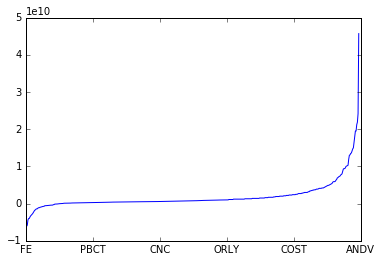

In [825]:
_df.annual_profit.sort_values().plot()

In [826]:
_df[_df.annual_profit > 0].count()

pe_ratio                     434
previous_close               444
annual_profit                444
average_volume               444
eps_forecast                   0
todays_open                  444
revenue_growth               443
net_profit_margin            444
earnings_growth_last_yr      431
price_sales                  444
last_reporting_date            6
earnings_growth_this_yr      439
sector                       444
annual_revenue               444
industry                     444
next_reporting_date          438
dividend_yield               374
earnings_growth_next_5_yr    444
price_book                   444
days_range                   444
market_cap                   444
volume                       444
dtype: int64

In [832]:
_df[_df.annual_profit < 0].reset_index().groupby('industry').count()['index'].sort_values(ascending=False)

industry
Oil & Gas Production                  18
Semiconductors                         4
Oilfield Services/Equipment            4
Electric Utilities                     4
Publishing: Newspapers                 2
Precious Metals                        2
Packaged Software                      2
Trucks/Construction/Farm Machinery     1
Hospital/Nursing Management            1
Apparel/Footwear Retail                1
Biotechnology                          1
Chemicals: Agricultural                1
Containers/Packaging                   1
Contract Drilling                      1
Data Processing Services               1
Miscellaneous Commercial Services      1
Household/Personal Care                1
Integrated Oil                         1
Life/Health Insurance                  1
Specialty Stores                       1
Multi-Line Insurance                   1
Oil & Gas Pipelines                    1
Pharmaceuticals: Other                 1
Real Estate Investment Trusts          1
Aluminu

In [839]:
_df.sort_values('pe_ratio', ascending=False)[['pe_ratio', 'earnings_growth_this_yr']]

,pe_ratio,earnings_growth_this_yr
AES,5333.3,7.36
EQT,2087.0,471.26
CAT,739.3,52.08
APA,658.0,112.68
AIG,505.8,1369.73
MET,490.5,1.64
OXY,398.3,170.44
SLB,372.6,32.58
ARE,275.7,173.35
AIV,250.3,87.08


In [855]:
_df.head()

,pe_ratio,previous_close,annual_profit,average_volume,eps_forecast,todays_open,revenue_growth,net_profit_margin,earnings_growth_last_yr,price_sales,...,sector,annual_revenue,industry,next_reporting_date,dividend_yield,earnings_growth_next_5_yr,price_book,days_range,market_cap,volume
IBM,12.0,143.03,1.190000e+10,4141263,NaN,142.98,2.23,14.87,8.54,1.99,...,Technology Services,7.990000e+10,Information Technology Services,"October 18, 2017",4.16,2.45,7.47,142.98 - 144.50,1.343000e+11,3351733
BHGE,NaN,33.9,-2.700000e+09,3109836,NaN,33.97,37.49,-27.82,40.53,2.87,...,Industrial Services,9.800000e+09,Oilfield Services/Equipment,"October 19, 2017",1.98,33.00,1.15,33.73 - 34.44,3.930000e+10,1724403
PKG,21.9,112.41,4.452000e+08,999133,NaN,112.71,0.65,7.70,6.42,1.38,...,Process Industries,5.800000e+09,Containers/Packaging,"October 16, 2017",2.22,5.00,6.07,112.71 - 113.63,1.070000e+10,434542
VRTX,157.5,160.54,-1.121000e+08,1907935,NaN,160.76,64.89,-6.58,80.09,10.59,...,Health Technology,1.700000e+09,Biotechnology,"October 31, 2017",NaN,68.00,34.83,158.85 - 163.64,4.090000e+10,1708717
LEG,18.4,45.97,3.667000e+08,922679,NaN,46.05,4.07,9.75,16.21,1.82,...,Consumer Durables,3.800000e+09,Home Furnishings,"October 27, 2017",3.10,10.00,5.68,46.05 - 46.53,6.100000e+09,606712


In [882]:
_df2 = _df.copy()
_df2 = _df.unstack().reset_index()
_df2.columns = ['Category', 'Symbol', 'Value']
_df2.fillna(0) #.groupby('Category').apply(lambda ss: ss[ss.Value == ss.Value.max()])

,Category,Symbol,Value
0,pe_ratio,IBM,12
1,pe_ratio,BHGE,0
2,pe_ratio,PKG,21.9
3,pe_ratio,VRTX,157.5
4,pe_ratio,LEG,18.4
5,pe_ratio,KR,13.5
6,pe_ratio,PCLN,39.3
7,pe_ratio,MAC,49.8
8,pe_ratio,F,11.9
9,pe_ratio,WYN,18.6


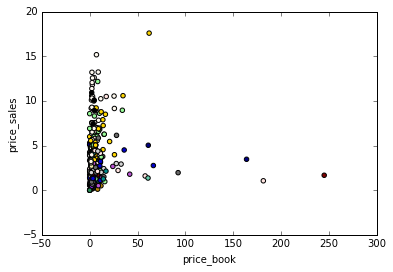

In [952]:
def c(*args):
    print(args)
    return 'red'

from matplotlib import cm
from matplotlib import colors
import random

_d2 = _df[['price_book', 'price_sales', 'sector']]
_d2 = _d2.reset_index()
_d2 = _d2.replace('--', 0)
sector_cm = {s: list(colors.cnames)[i] for i,s in enumerate(_d2.sector.unique())}
c = _d2.sector.apply(lambda s: sector_cm[s])
_d2.plot(x='price_book', y='price_sales', c=c, kind='scatter')

In [947]:
from matplotlib import colors
colors.cnames

<module 'numpy.ma' from '/home/jasonwirth/anaconda3/lib/python3.5/site-packages/numpy/ma/__init__.py'>

In [901]:
cm.cool(10)

(0.039215686274509803, 0.96078431372549022, 1.0, 1.0)

In [897]:
_d2.plot.scatter?

In [881]:
_df.isnull().sum()

pe_ratio                      42
previous_close                 0
annual_profit                  3
average_volume                 0
eps_forecast                 501
todays_open                    0
revenue_growth                 6
net_profit_margin              4
earnings_growth_last_yr       19
price_sales                    0
last_reporting_date          494
earnings_growth_this_yr       10
sector                         0
annual_revenue                 3
industry                       0
next_reporting_date            7
dividend_yield                82
earnings_growth_next_5_yr      3
price_book                     0
days_range                     0
market_cap                     3
volume                         0
dtype: int64